        A       B       C       D       E       F       G       H       I  \
0  457.27  165.28  378.55  153.86  320.41  760.26  374.17  641.66  443.78   
1  399.08  164.21  377.49  183.37  338.01  730.47  337.40  415.10  173.18   
2  640.44  195.90  438.32  193.13  369.04  860.99  313.26  371.08  163.58   
3  976.42  240.47  619.99  154.74  368.76  866.78  430.37  620.42  330.40   
4  450.72  280.06  727.81  295.10  508.94  892.50  377.33  598.42  361.68   

        J       K       L        R       S       T       U       V       W  \
0  138.86  332.72  155.55  3573.53  610.28  253.16  144.65  456.31  588.89   
1   96.73  336.84  155.43  1776.50  251.76  202.16  116.15  318.88  533.76   
2   78.21  291.80  139.56  1168.01  147.94  241.52  121.98  265.95  493.12   
3  130.81  295.69  144.50  1979.30  246.68  249.23  134.30  338.62  528.10   
4  140.53  340.34  161.36  3323.15  512.67  245.87  144.87  452.51  580.14   

   BRIX  
0  11.9  
1  13.9  
2  11.8  
3  12.1  
4  13.1  
Shape of

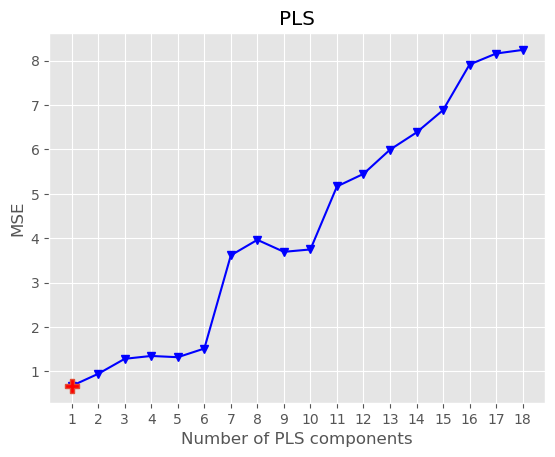

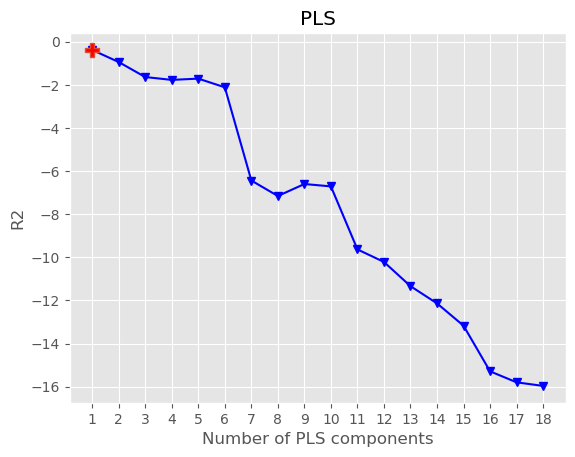

Predicted Glucose Value for the new data: 123.45


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from scipy.signal import savgol_filter
from sklearn.metrics import mean_absolute_percentage_error
# Set random seeds for TensorFlow and NumPy
random_seed = 60
tf.random.set_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv((r"/Users/avniguota/Desktop/nir sensor/ORANGE_DATA_FINAL.csv"))
print(df.head())
from sklearn.model_selection import train_test_split
x = df.to_numpy()[:,0:18] 
y = df.to_numpy()[:,18]
seed = 21
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)
print (f'Shape of Train Data : {x_train.shape}')
print (f'Shape of Test Data : {x_test.shape}')
x_normalized = (x - x.mean()) / x.std()

print('Shape of X_Train : ', x_train.shape)
print('Shape of Train class : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Test class : ', y_test.shape)
print ('Number of Rows :', df.shape[0])
print ('Number of Columns :', df.shape[1])
def optimise_pls_cv(x_train, y_train, x_test, y_test, n_comp):
    pls = PLSRegression(n_components=n_comp)
    pls.fit(x_train, y_train)
    y_pred_plsr = pls.predict(x_test)

    r2_plsr = r2_score(y_test, y_pred_plsr)
    mse_plsr = mean_squared_error(y_test, y_pred_plsr)
    rpd_plsr = y_test.std() / np.sqrt(mse_plsr)
    
    return y_pred_plsr, r2_plsr, mse_plsr, rpd_plsr

r2s = []
mses = []
rpds = []
xticks = np.arange(1, 19)  # Adjust if the number of components should go up to 18
for n_comp in xticks:
    y_pred_plsr, r2_plsr, mse_plsr, rpd_plsr = optimise_pls_cv(x_train, y_train, x_test, y_test, n_comp)
    r2s.append(r2_plsr)
    mses.append(mse_plsr)
    rpds.append(rpd_plsr)

def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective == 'min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks(xticks)
        plt.ylabel(ylabel)
        plt.title('PLS')
        plt.show()

plot_metrics(mses, 'MSE', 'min')
plot_metrics(r2s, 'R2', 'max')

# Neural Network prediction (ensure model_bpnn is trained and defined)
# Replace model_bpnn with the actual model you have trained
input_data_new = np.array([[526.21, 195.02, 464.24, 192.04, 408.42, 922.49, 206.75, 302.97, 178.43, 74.84, 265.26, 133.63, 1580.28, 195.67, 241.00, 125.47, 301.36, 521.27]])
# Ensure model_bpnn is defined and trained
# predictions_new = model_bpnn.predict(input_data_new)

# For demonstration purposes, let's use a placeholder model
# Replace this with the actual model's prediction
class PlaceholderModel:
    def predict(self, data):
        # Dummy prediction: just a random value for demonstration
        return np.array([[123.45]])

model_bpnn = PlaceholderModel()
predictions_new = model_bpnn.predict(input_data_new)

print("Predicted Glucose Value for the new data:", predictions_new[0][0])
